### In this project, we wiil see how ınvestements on diffeerent channels effect the increase on sales. There are 3 categories for investment as Radio,Newspaper, and TV 

<img src="https://th.bing.com/th/id/R.371bbd044da16c02526a8884bf5124b8?rik=cLOfBrNnz16TBw&riu=http%3a%2f%2fschool.mangoanimate.com%2fwp-content%2fuploads%2f2020%2f10%2fAnimated-Ads-Maker-Mango-Animation-Maker.png&ehk=237kBfRfwpXi7%2fCdZjpeRe3685K%2fAWlxuFapT2czEvA%3d&risl=&pid=ImgRaw&r=0">

### Install and import packages

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree, ExtraTreeRegressor
#pip install xgboost
from xgboost import XGBRegressor
from sklearn.svm import SVR

from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

from sklearn.preprocessing import StandardScaler

In [7]:
df=pd.read_csv('advertising.csv')

## EDA - Exploratory DataAnalysis 

In [10]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [12]:
df.shape

(200, 4)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [18]:
df.sample()

,TV,Radio,Newspaper,Sales
36,266.9,43.8,5.0,25.4


In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [22]:
df.corr(numeric_only=True)

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


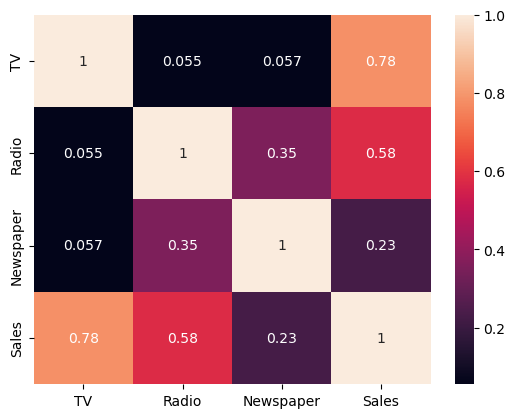

In [24]:
sns.heatmap(df.corr(numeric_only=True),annot=True); #; TV has high effect at first glance

In [26]:
df.isnull().sum() # hangi sütunda kaç boş veri var

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

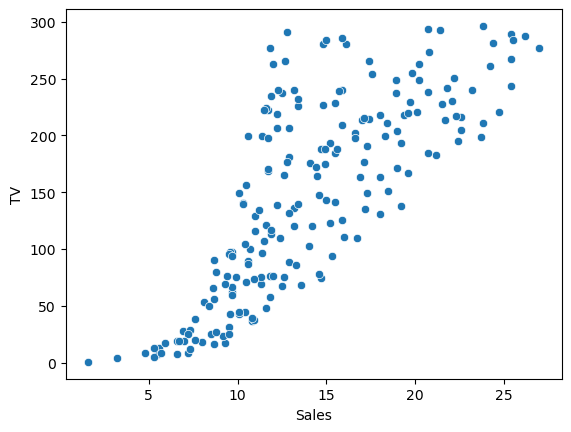

In [28]:
sns.scatterplot(x='Sales',y='TV', data=df);

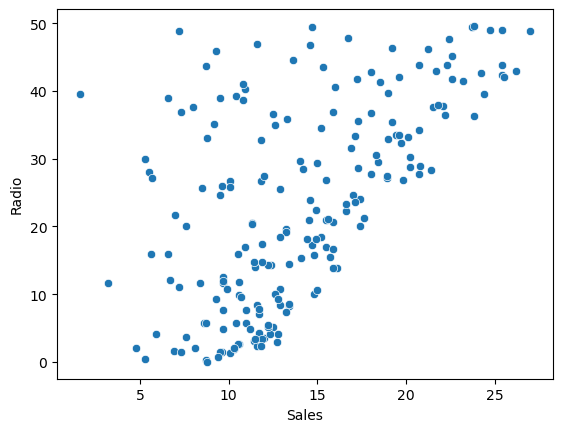

In [30]:
sns.scatterplot(x='Sales',y='Radio', data=df);

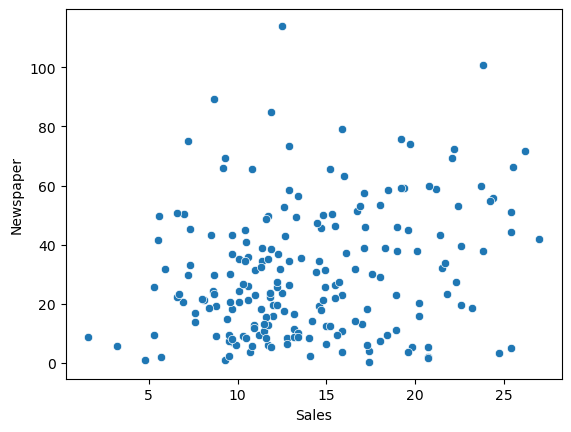

In [32]:
sns.scatterplot(x='Sales',y='Newspaper', data=df);

### Observing p value

In [38]:
from scipy.stats import ttest_ind

In [42]:
#Ho = Sales ve TV yatırımı arasında bir bağ yok
#Ha = Sales ve TV yatırımı arasında bir bağ var

In [48]:
t,p=ttest_ind(df['TV'],df['Sales'])

In [50]:
p

3.287531216460733e-70

In [52]:
t

21.87105520413898

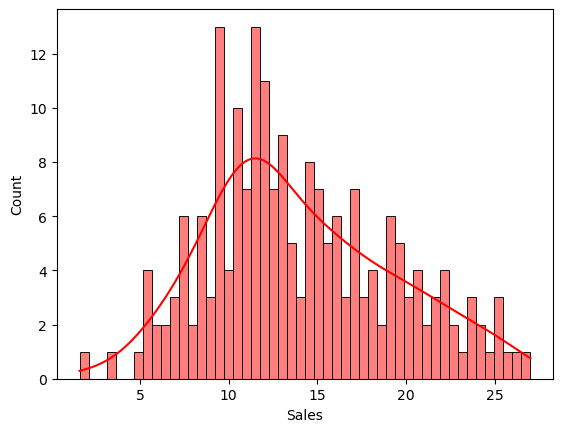

In [54]:
sns.histplot(x=df['Sales'],kde=True, color='red', bins=50);

<Axes: xlabel='Sales', ylabel='Density'>

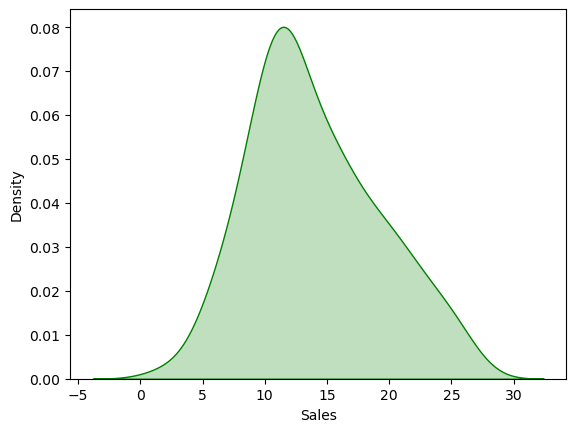

In [56]:
sns.kdeplot(x=df['Sales'], fill=True,color='green')

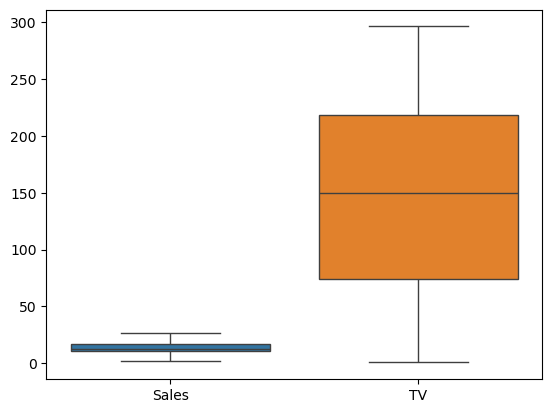

In [58]:
sns.boxplot([df['Sales'], df['TV']]);

## Feature Engineering

In [63]:
df.corr(numeric_only=True)

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [65]:
abs(df.corr(numeric_only=True)['Sales'].sort_values(ascending=False)) #0.9'un üstünü(veri kendini tekrar ediyor olmasın diye) ve 0.2 altında olanları almıyoruz çünkü contribution'u az bu parametrelerin

Sales        1.000000
TV           0.782224
Radio        0.576223
Newspaper    0.228299
Name: Sales, dtype: float64

In [75]:
x=df[['TV','Newspaper','Radio']]
y=df[['Sales']]

In [77]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [79]:
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (200, 3)
Shape of y: (200, 1)


## Modeling

In [82]:
lr=LinearRegression()

In [84]:
model=lr.fit(x_train,y_train) #makine Ogrenmesi

In [86]:
tahmin=model.predict(x_test)

In [88]:
mean_squared_error(y_test,tahmin) ** .5 

1.7815996615334502

In [90]:
r2_score(y_test,tahmin) 

0.899438024100912

In [92]:
R=Ridge()
L=Lasso()
E=ElasticNet()

In [94]:
Rmodel=R.fit(x_train,y_train)

In [96]:
tahmin2=Rmodel.predict(x_test)

In [98]:
mean_squared_error(y_test,tahmin2)**0.5

1.781598948162221

In [100]:
r2_score(y_test,tahmin2)

0.89943810463304

In [102]:
dt=DecisionTreeRegressor()

In [104]:
Dmodel=dt.fit(x_train,y_train)

In [106]:
tahmin3=dt.predict(x_test)

In [108]:
mean_squared_error(y_test,tahmin3)**.5

1.3119641763401926

In [110]:
r2_score(y_test,tahmin3)

0.9454672362838912

In [116]:
from sklearn.ensemble import ExtraTreesRegressor  #grup yani birçok ağaç modelini deniyor

In [118]:
ET=ExtraTreesRegressor()

In [122]:
ETmodel=ET.fit(x_train,y_train)

In [124]:
tahmin4=ET.predict(x_test)

In [126]:
mean_squared_error(y_test,tahmin4)**.5

0.5008656256921565

In [130]:
r2_score(y_test,tahmin4)

0.9920520338404116